<a href="https://colab.research.google.com/github/rajatagstats/Classification-Analysis-/blob/main/Classification_Problem_(BA_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
**Group Members**

VINAY KUMAR SHARMA (VMC) , RAJAT AGARWAL


---



**Classification Analysis** :-

---



Here our aim is to fit vaious model for particular classification data problem . Among various model we have to choose best model . We have decided to fit following model on data based on the data specification(we have all numerically  feature in data set and binary response variable ) :-

1.   Logistic Regression model
2.   LDA (Linear Discriminant Analysis)
3.   SVM(Support Vector Macine)
4.   KNN Classifier (K-nearest neighbour)


---








In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(200, 21)
         x1        x2        x3        x4  ...       x18       x19       x20  y
0  0.832164  0.734772  0.626653  0.238078  ...  0.681197  0.415797  0.351630  1
1  0.434020  0.054741  0.316852  0.229558  ...  0.751885  0.696986  0.664690  1
2  0.167477  0.627895  0.379868  0.834608  ...  0.942410  0.250488  0.401736  0
3  0.917487  0.349867  0.026223  0.904135  ...  0.262307  0.917623  0.252353  0
4  0.262515  0.128063  0.684576  0.452624  ...  0.465901  0.748553  0.740586  1

[5 rows x 21 columns]
x1     0.084393
x2     0.089978
x3     0.078789
x4     0.076074
x5     0.078319
x6     0.085112
x7     0.089061
x8     0.079884
x9     0.089490
x10    0.087808
x11    0.080923
x12    0.087338
x13    0.085123
x14    0.078951
x15    0.087578
x16    0.076995
x17    0.082058
x18    0.083995
x19    0.090494
x20    0.092117
y      0.251030
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f0d67e160>,
      dtype=object)

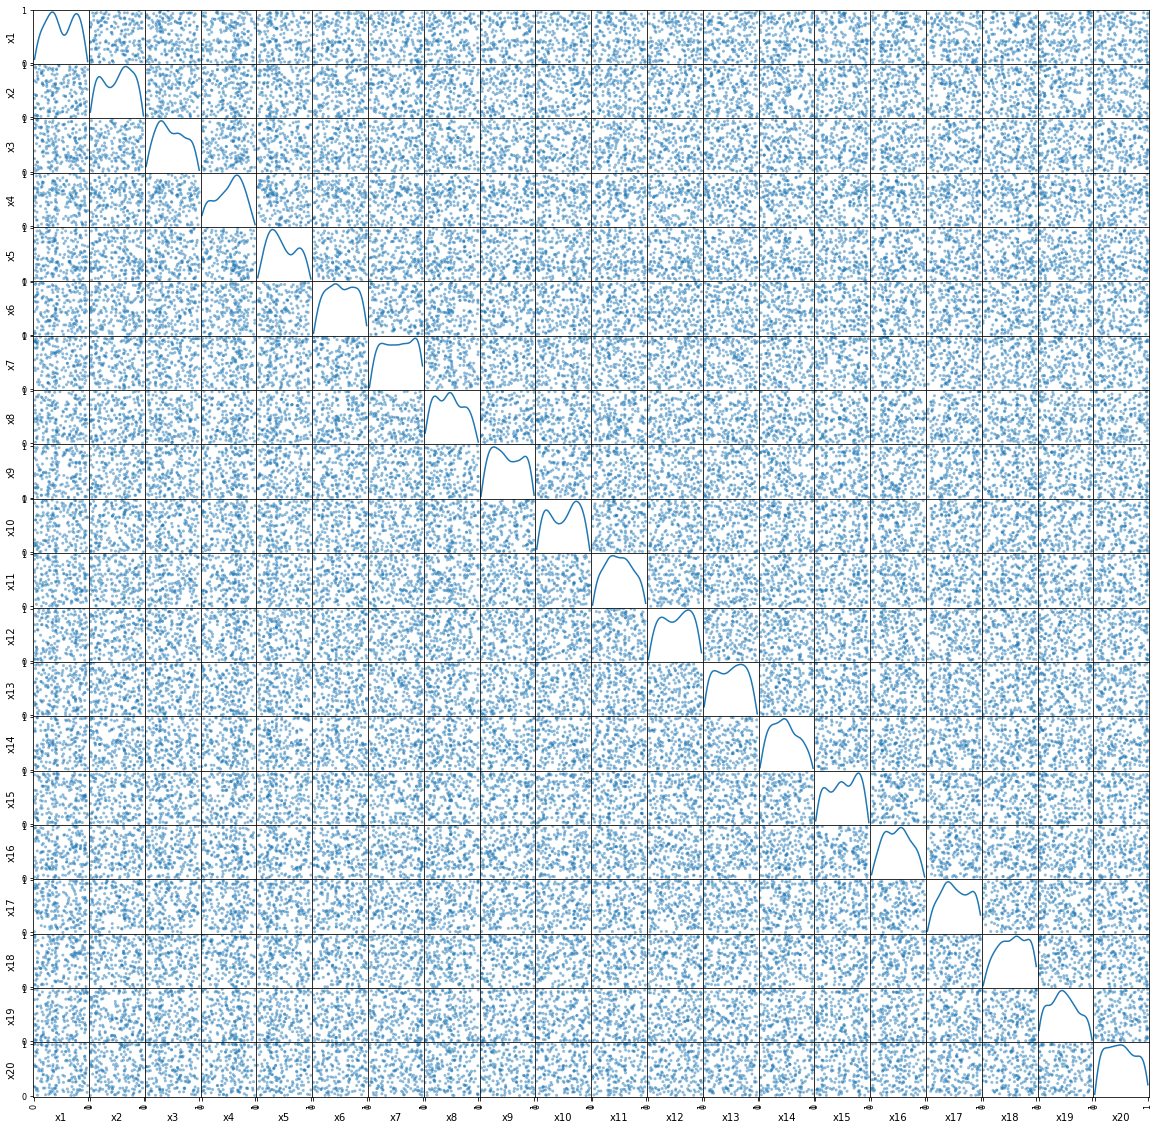

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
print(data.shape)
print(data.head(5))
np.sum(data.isnull()) # we have no missing observation 
print(data.var()) # represent each feature has approx equal variance 
pd.plotting.scatter_matrix(data.iloc[:,0:20],diagonal = 'kde',figsize=(20,20))
# It is clear that feature  is independent from scatterplot 
#have approximate  gaussian distribution from density plot 
# and also all feature have approx equal variance 

In [ ]:
#################################################
###LOGISTIC REGRESSION MODEL FOR CLASSIFICATION##
#################################################
import numpy as np
import pandas as pd

##importing dataset i.e. train and test data 
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
print('test data dimensions ',test_data.shape)

#Setting response and predictor both for train and test data 
X_train = train_data.iloc[:,0:20]
y_train = train_data['y']
X_test = test_data.iloc[:,0:20]
y_test = test_data['y']

##Fitting logistic regression model on train data 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

#Prediction on the basis of fitted model for  test data 
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test) 

#Checking the performance of our model on train and test data – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_train = confusion_matrix(y_train , y_pred_train)
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))



test data dimensions  (1000, 21)
Confusion Matrix for training dataset : 
 [[93 10]
 [10 87]]
Accuracy on train data :  0.9
Mis-Classification error rate on train data :  0.09999999999999998
Confusion Matrix for testing dataset : 
 [[418  73]
 [ 95 414]]
Accuracy on test data :  0.832
Mis-Classification error rate on test data :  0.16800000000000004


Linear Discriminant Analysis performance on train and test data
Confusion Matrix for training dataset : 
 [[93 10]
 [10 87]]
Accuracy on train data :  0.9
Mis-Classification error rate on train data :  0.09999999999999998
Confusion Matrix for testing dataset : 
 [[419  72]
 [ 86 423]]
Accuracy on test data :  0.842
Mis-Classification error rate on test data :  0.15800000000000003


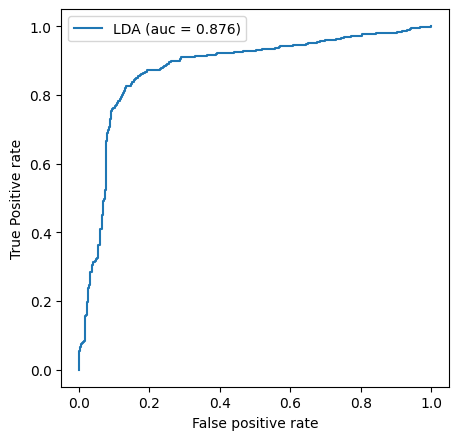

Qudratic Discriminant Analysis Performance on test and train data 
Confusion Matrix for training dataset : 
 [[96  7]
 [ 7 90]]
Accuracy on train data :  0.93
Mis-Classification error rate on train data :  0.06999999999999995
Confusion Matrix for testing dataset : 
 [[359 132]
 [126 383]]
Accuracy on test data :  0.742
Mis-Classification error rate on test data :  0.258


In [ ]:
####################################################################
##LDA classification model #########################################
####################################################################

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
##importing dataset i.e. train and test data 
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

#Setting response and predictor both for train and test data 
X_train = train_data.iloc[:,0:20]
y_train = train_data['y']
X_test = test_data.iloc[:,0:20]
y_test = test_data['y']

#Performing  Linear Discriminant Analysis on train datasets 
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

#Prediction on the basis of fitted model for  test data 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

#Let’s test the LDA performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_train = confusion_matrix(y_train , y_pred_train)
print('Linear Discriminant Analysis performance on train and test data')
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , auc
y_predict = model.decision_function(X_test)
LDA_fpr , LDA_tpr , threshold = roc_curve(y_test , y_predict)
auc_LDA = auc(LDA_fpr , LDA_tpr)

plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(LDA_fpr,LDA_tpr ,label = 'LDA (auc = %0.3f)'%auc_LDA)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()


#Performing  Quadratic Discriminant Analysis on train datasets 
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

#Prediction on the basis of fitted model for  test data 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

#Let’s test the QDA performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_train = confusion_matrix(y_train , y_pred_train)
print('Qudratic Discriminant Analysis Performance on test and train data ')
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))



In [ ]:
###############################################################
####Support Vector Machine ####################################
###############################################################

import numpy as np
import pandas as pd

##importing dataset i.e. train and test data 
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

#Setting response and predictor both for train and test data 
X_train = train_data.iloc[:,0:20]
y_train = train_data['y']
X_test = test_data.iloc[:,0:20]
y_test = test_data['y']

##Fitting SVM on train data linear kernel 
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

#Prediction on the basis of fitted model for  test data 
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test) 

#Let’s test the performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Linear kernel SVM')
cm_train = confusion_matrix(y_train , y_pred_train)
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))

classifier=SVC(kernel='poly',random_state=0)
classifier.fit(X_train,y_train)

#Prediction on the basis of fitted model for  test data 
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test) 

#Let’s test the performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('polynomial kernel SVM')
cm_train = confusion_matrix(y_train , y_pred_train)
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))


classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

#Prediction on the basis of fitted model for  test data 
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test) 

#Let’s test the performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('rbf kernel SVM')
cm_train = confusion_matrix(y_train , y_pred_train)
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))


Linear kernel SVM
Confusion Matrix for training dataset : 
 [[96  7]
 [14 83]]
Accuracy on train data :  0.895
Mis-Classification error rate on train data :  0.10499999999999998
Confusion Matrix for testing dataset : 
 [[426  65]
 [103 406]]
Accuracy on test data :  0.832
Mis-Classification error rate on test data :  0.16800000000000004
polynomial kernel SVM
Confusion Matrix for training dataset : 
 [[103   0]
 [  0  97]]
Accuracy on train data :  1.0
Mis-Classification error rate on train data :  0.0
Confusion Matrix for testing dataset : 
 [[370 121]
 [119 390]]
Accuracy on test data :  0.76
Mis-Classification error rate on test data :  0.24
rbf kernel SVM
Confusion Matrix for training dataset : 
 [[101   2]
 [  6  91]]
Accuracy on train data :  0.96
Mis-Classification error rate on train data :  0.040000000000000036
Confusion Matrix for testing dataset : 
 [[409  82]
 [101 408]]
Accuracy on test data :  0.817
Mis-Classification error rate on test data :  0.18300000000000005


In [ ]:
###############################################################
#### K-Nearest neighbor #######################################
###############################################################


import numpy as np
import pandas as pd
#
##importing dataset i.e. train and test data 
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
print(df.shape)
print(df.columns)
#Setting response and predictor both for train and test data 
X_train = df.iloc[:,0:20]
y_train = df['y']
X_test = df_test.iloc[:,0:20]
y_test = df_test['y']

##Fitting KNN on train data 
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=30,metric='minkowski',p=2)
classifier.fit(X_train,y_train)


#Prediction on the basis of fitted model for  test data 
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test) 

#Let’s test the performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_train = confusion_matrix(y_train , y_pred_train)
print ("Confusion Matrix for training dataset : \n", cm_train)
print ("Accuracy on train data : ", accuracy_score(y_train , y_pred_train))
print ("Mis-Classification error rate on train data : ", 
       1-accuracy_score(y_train , y_pred_train)) 
cm_test = confusion_matrix(y_test, y_pred_test) 
print ("Confusion Matrix for testing dataset : \n", cm_test) 
print ("Accuracy on test data : ", accuracy_score(y_test, y_pred_test))
print ("Mis-Classification error rate on test data : ", 
       1-accuracy_score(y_test , y_pred_test))


(200, 21)
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'y'],
      dtype='object')
Confusion Matrix for training dataset : 
 [[81 22]
 [18 79]]
Accuracy on train data :  0.8
Mis-Classification error rate on train data :  0.19999999999999996
Confusion Matrix for testing dataset : 
 [[369 122]
 [126 383]]
Accuracy on test data :  0.752
Mis-Classification error rate on test data :  0.248


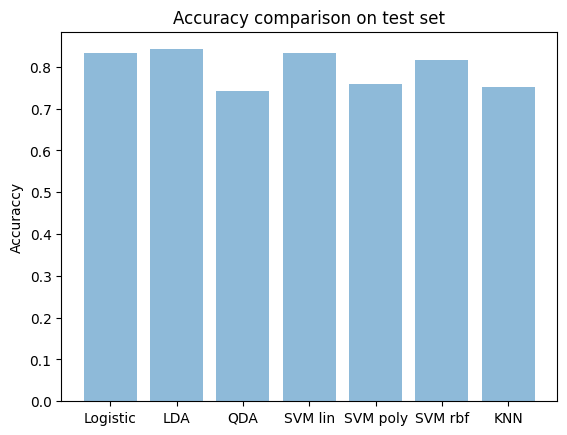

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic', 'LDA','QDA', 'SVM lin','SVM poly','SVM rbf', 'KNN')
y_pos = np.arange(len(objects))
performance = [0.832,0.842,0.742,0.832,0.76,0.817,0.752]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuraccy')
plt.title('Accuracy comparison on test set')

plt.show()

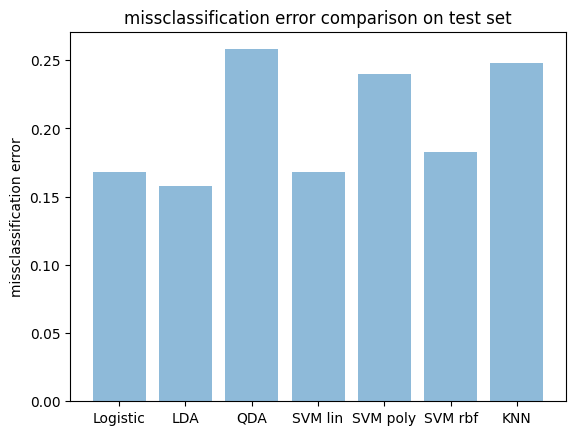

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic', 'LDA','QDA', 'SVM lin','SVM poly','SVM rbf', 'KNN')
y_pos = np.arange(len(objects))
performance = [1-0.832,1-0.842,1-0.742,1-0.832,1-0.76,1-0.817,1-0.752]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('missclassification error')
plt.title('missclassification error comparison on test set')

plt.show()

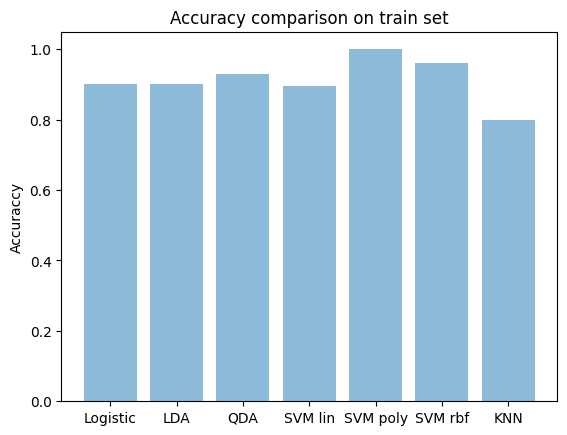

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic', 'LDA','QDA', 'SVM lin','SVM poly','SVM rbf', 'KNN')
y_pos = np.arange(len(objects))
performance = [0.9,0.9,0.93,0.895,1.00,0.96,0.8]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuraccy')
plt.title('Accuracy comparison on train set')

plt.show()

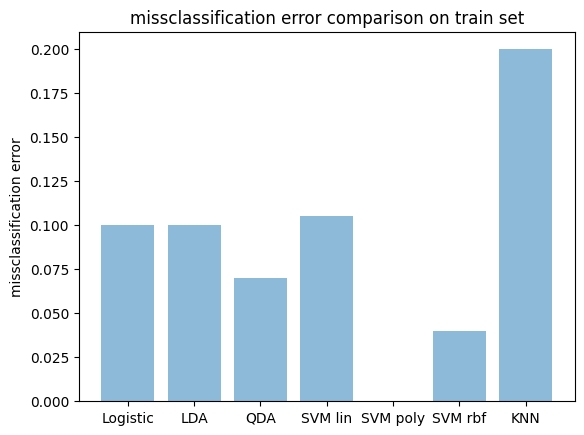

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic', 'LDA','QDA', 'SVM lin','SVM poly','SVM rbf', 'KNN')
y_pos = np.arange(len(objects))
performance = [1-0.9,1-0.9,1-0.93,1-0.895,1-1.00,1-0.96,1-0.8]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('missclassification error')
plt.title('missclassification error comparison on train set')

plt.show()

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["models", "Accuracy(test set)", "misclassification error (test set)"]

x.add_row(["Logistic", 0.832,1-0.832])
x.add_row(["LDA", 0.842,1-0.842])
x.add_row(["QDA", 0.742,1-0.742])
x.add_row(["SVM lin",0.832,1-0.832])
x.add_row(["SVM poly", 0.76,1-0.76])
x.add_row(["SVM rbf", 0.817,1-0.817])
x.add_row(["KNN",0.752,1-0.752])

print(x)

+----------+--------------------+------------------------------------+
|  models  | Accuracy(test set) | misclassification error (test set) |
+----------+--------------------+------------------------------------+
| Logistic |       0.832        |        0.16800000000000004         |
|   LDA    |       0.842        |        0.15800000000000003         |
|   QDA    |       0.742        |               0.258                |
| SVM lin  |       0.832        |        0.16800000000000004         |
| SVM poly |        0.76        |                0.24                |
| SVM rbf  |       0.817        |        0.18300000000000005         |
|   KNN    |       0.752        |               0.248                |
+----------+--------------------+------------------------------------+
